In [311]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import matplotlib.style as style

In [291]:
def randomized_search(estimator_, X_train_, y_train_, param_grid_, cv_, verbose_, n_jobs_, n_iter_, scoring_='neg_mean_squared_error', random_state=1):
    estimator_grid = RandomizedSearchCV(estimator=estimator_, param_distributions=param_grid_,
                       cv=cv_, scoring=scoring_,
                       verbose=verbose_, n_jobs=n_jobs_, n_iter=n_iter_, random_state=seed)
    estimator_grid.fit(X_train_, y_train_)
    return estimator_grid.best_estimator_, estimator_grid.best_params_

def cross_val_rmse_(model_, X_train_, y_train_, cv_, scoring_='neg_mean_squared_error'):
    model_cv_scores = cross_val_score(model_, X_train_, y_train_, cv=cv_, scoring=scoring_)
    model_rmse = np.sqrt(-model_cv_scores.mean())
    return model_rmse

In [292]:
data = pd.read_csv("real_estate_PML.csv")
paris = data[data['ville']=='Paris']

In [293]:
X = paris.drop(['ville', 'type_l', 'prix', 'prix_m2'], axis=1)
y = paris['prix']

In [294]:
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.3)

In [295]:
dt = DecisionTreeRegressor(random_state=seed)
gb = GradientBoostingRegressor(random_state=seed, verbose=1)
adb = AdaBoostRegressor(random_state=seed)
rf = RandomForestRegressor(random_state=seed)

In [296]:
gb_params = {
    'learning_rate': [0.1, 0.2, 0.5, 1],
     'init': [None, DecisionTreeRegressor(random_state=1)],
     'max_depth': [1, 2, 5, 10, 15],
     'min_samples_leaf': [0.2, 0.5, 0.8, 1],
     'warm_start': [True, False],
     'subsample': [0.5, 0.8, 1],
     'n_estimators': [10, 20, 50, 100, 200, 500]}

dt_params = {
    'max_depth':range(1,20),
    'min_samples_leaf':[0.1, 0.2, 0.3, 0.5, 0.8, 1],
    'min_samples_split':[1, 2, 3, 5, 10]}

rf_params = {
    'bootstrap':[True, False],
    'ccp_alpha':[0.2, 0.4, 0.6, 0.8, 1],
    'max_depth':[1, 2, 4, 6, 8, 10, 12, 14, 15],
    'min_samples_leaf':[0.2, 0.4, 0.6, 0.8, 1],
    'n_estimators':[20, 50, 100, 250, 500]
}

In [297]:
#Ada boost for later on best performing model / base model(s)
#adb_params = {
#   'estimator':[None, dt, rf],
#    'learning_rate':[0.05,0.1,0.2,0.4,0.6,0.8,1]
#    'n_estimators':[10,20,50,100,200,500]}

In [298]:
dt_best_model, dt_best_hp = randomized_search(dt, X_train, y_train, param_grid_=dt_params, cv_=5, verbose_=0, n_jobs_=-1, n_iter_=250)
dt_train_rmse = cross_val_rmse_(dt_best_model, X_train_=X_train, y_train_=y_train, cv_=5)

c:\nkt\real_estate\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
245 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "c:\nkt\real_estate\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\nkt\real_estate\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\nkt\real_estate\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\nkt\real_estate\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
 

In [299]:
rf_best_model, rf_best_hp = randomized_search(rf, X_train, y_train, param_grid_=rf_params, cv_=5, verbose_=0, n_jobs_=-1, n_iter_= 200)
rf_train_rmse = cross_val_rmse_(rf_best_model, X_train_=X_train, y_train_=y_train, cv_=5)

In [300]:
gb_best_model, gb_best_params = randomized_search(gb, X_train, y_train, param_grid_=gb_params, cv_=5, verbose_=0, n_jobs_=-1, n_iter_=300)
gb_train_rmse = cross_val_rmse_(gb_best_model, X_train, y_train, 5)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 556945689867.4476 127615241811.4567            0.04s
         2 551942275573.6553 65142617314.1945            0.03s
         3 446137599362.6199 75130607553.1008            0.03s
         4 363365002840.3961 53438201437.9937            0.02s
         5 305214032062.6334 53124934413.3270            0.02s
         6 280191957889.0630 36147686958.5105            0.02s
         7 242175095750.5009 24561760903.0494            0.02s
         8 199721769740.2493 25464544272.4716            0.02s
         9 166681073438.9728 21647103452.4074            0.02s
        10 139042022430.0225 20209035937.8458            0.01s
        20 59828447772.0932  1970268193.5179            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 515854526448.6384 148002760523.8621            0.02s
         2 436614197021.8301 112271839946.7920            0.02s
         3 434325855411.9348 79730723380.3297        

In [301]:
print(f"DTRegressor train RMSE:{dt_train_rmse}")
print(f"Stochastic Gradient Boost train RMSE:{gb_train_rmse}")
print(f"RFRegressor train RMSE: {rf_train_rmse}")

DTRegressor train RMSE:394577.1082810969
Stochastic Gradient Boost train RMSE:378504.3257485061
RFRegressor train RMSE: 360327.1574266953


In [302]:
preds = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
models = [dt_best_model, rf_best_model, gb_best_model]
test_rmses = []
for pred, model in zip(preds, models):
    pred_val = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred_val, squared=False)
    test_rmses.append(f"{pred} test RMSE: {rmse}")

In [303]:
for i, val in enumerate(test_rmses):
    print(val)

Decision Tree test RMSE: 493908.4887224027
Random Forest test RMSE: 467867.9526086015
Gradient Boosting test RMSE: 525576.5939215085


In [342]:
y_preds = rf_best_model.predict(X_test)
y_preds = pd.Series(y_preds, index=X_test.index)
df = pd.concat([y_test, y_preds], axis=1, keys = ['predicts', 'test'])
pd.options.display.float_format = '{:.1f}'.format
df['difference'] = df['test']-df['predicts']

In [345]:
df = df.sort_values(by="test").reset_index(drop=True)

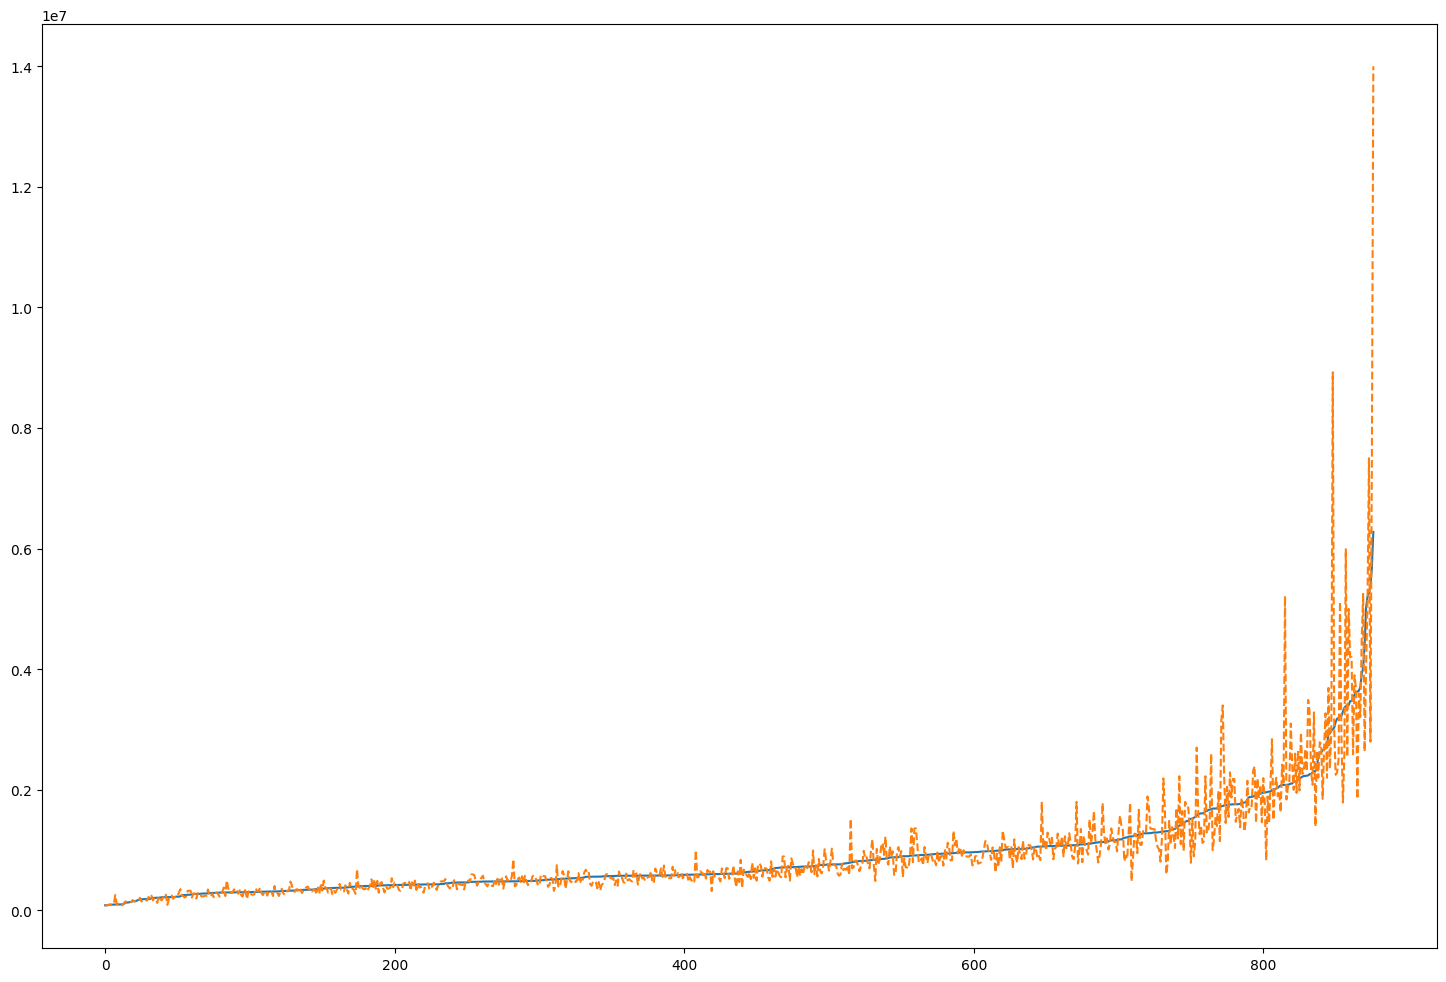

In [361]:
def test_pred_plotter(x, y1, y2, figsize_=(18,12), linestyle_ = '--'):
    fig, ax = plt.subplots(figsize=figsize_)
    plt.plot(x, y1)
    plt.plot(x, y2, linestyle=linestyle_)
test_pred_plotter(df.index, df['test'], df['predicts'])

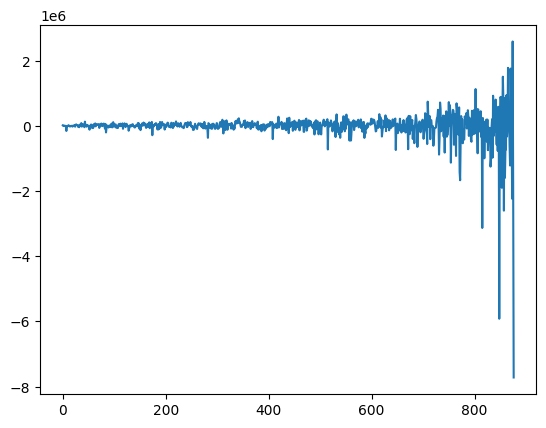

In [350]:
plt.plot(df.index, df.difference)
plt.show()

In [352]:
# Outliers removal
paris['prix'].describe()

count       2921.0
mean      891919.0
std       894786.0
min        60000.0
25%       418000.0
50%       640000.0
75%      1030000.0
max     14000000.0
Name: prix, dtype: float64

In [360]:
q1_prix, q2_prix, q3_prix, q4_prix = paris['prix'].quantile([0.25, 0.5, 0.75, 1])
iqr_prix = q3_prix - q1_prix
lower_prix = q1_prix- 1.5*iqr_prix
upper_prix = q3_prix + 1.5*iqr_prix
paris_filtered = paris.query('prix>=@lower_prix and prix<=@upper_prix')
paris_filtered.shape, paris.shape

((2691, 8), (2921, 8))

In [362]:
X_ = paris_filtered.drop(['ville', 'type_l', 'prix', 'prix_m2'], axis=1)
y_ = paris_filtered['prix']
seed = 5
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, random_state=seed, test_size=0.3)

In [363]:
rf_best_model_, rf_best_hp_ = randomized_search(rf, X_train_, y_train_, param_grid_=rf_params, cv_=5, verbose_=0,
                                              n_jobs_=-1, n_iter_=200)
rf_train_rmse_ = cross_val_rmse_(rf_best_model_, X_train_=X_train_, y_train_=y_train_, cv_=5)
gb_best_model_, gb_best_params_ = randomized_search(gb, X_train_, y_train_, param_grid_=gb_params, cv_=5, verbose_=0,
                                                  n_jobs_=-1, n_iter_=300)
gb_train_rmse_ = cross_val_rmse_(gb_best_model_, X_train_, y_train_, 5)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 98479816015.3354 49751086097.4436            0.04s
         2 73576839926.1863 26718970202.7073            0.04s
         3 50404470126.0763 18359021363.5121            0.03s
         4 34102760423.5126 12502774211.6156            0.03s
         5 24879129081.8060  7196384375.7462            0.03s
         6 19568525367.4047  4803386678.2014            0.03s
         7 14070477364.7047  2999905271.7496            0.03s
         8 12093924903.9283  1368944845.0129            0.03s
         9 10261521417.9914   900949302.5591            0.03s
        10  8458897548.1095   146501641.8754            0.02s
        20  4458760087.6819  -293416679.0339            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1 100950156876.0838 46675832692.2609            0.04s
         2 68874848724.8787 30909662518.7430            0.04s
         3 43915547654.6064 18466055990.2875            0.03s
     

In [364]:
print(f"Stochastic Gradient Boost train RMSE:{gb_train_rmse_}")
print(f"RFRegressor train RMSE: {rf_train_rmse_}")

Stochastic Gradient Boost train RMSE:166743.28356659284
RFRegressor train RMSE: 156283.4235701129


In [365]:
preds_ = ['Random Forest', 'Gradient Boosting']
models_ = [rf_best_model, gb_best_model]
test_rmses_ = []
for pred, model in zip(preds_, models_):
    pred_val_ = model.predict(X_test_)
    rmse_ = mean_squared_error(y_test_, pred_val_, squared=False)
    test_rmses_.append(f"{pred} test RMSE: {rmse_}")
for i, val in enumerate(test_rmses_):
    print(val)

Random Forest test RMSE: 169549.79528073137
Gradient Boosting test RMSE: 176714.00018222208
